In [4]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Matplotlib overview

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
# plt.show()를 안 해도 그래프를 볼 수 있도록 해주는 매직 커맨드.

![](https://matplotlib.org/_images/anatomy.png)

![](https://static.packt-cdn.com/products/9781784393878/graphics/9ec8935e-0bdc-46aa-b392-18c5431a2218.png)

- 출처
    - https://matplotlib.org
    - https://subscription.packtpub.com/book/data/9781784393878/11/ch11lvl1sec112/getting-started-with-matplotlib

- 2가지 구성요소
    - Figure 
        - 틀
    - Axes 
        - Figure 바로 아래에, 실제 그래프가 그려질 공간
        - 실제로 가장 많이 사용할 요소
            - 이 안에 각종 plotting components가 존재  


# Matplotlib의 2가지 인터페이스

- Matplotlib이 배우고 익히기 어려운 이유 중 하나

In [17]:
import FinanceDataReader as fdr

samsung_df = fdr.DataReader('005390', '2017-01-01', '2017-12-31')
samsung_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,1260,1300,1255,1295,1232965,0.040
2017-01-03,1305,1315,1280,1310,886559,0.012
2017-01-04,1305,1310,1280,1305,446070,-0.004
2017-01-05,1305,1330,1300,1320,721691,0.011
2017-01-06,1320,1345,1305,1325,645608,0.004


## Stateful

- Matplotlib이 암묵적으로 현재 상태를 들고 있음
    - 내부적으로 현재 타겟이 되는 figure, ax 등을 설정하고, operation이 발생하면 '내부에서' 해당 figure,ax에 적용함
- 사용은 비추
    - matplotlib이 암묵적, 내부적으로 변화를 진행하고 적용하기 때문에, 직관적이지 못함
    - 다수의 plot을 한번에 그리기 어려움
    - 그냥 간단히 테스트 해볼 때 정도에만 사용

In [1]:
x = [1,2,3]
y = [4,5,6]

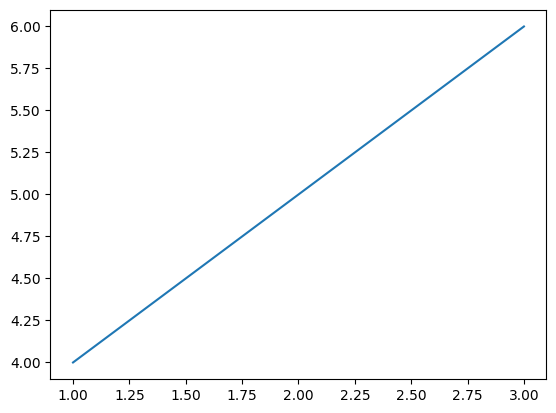

In [9]:
something = plt.plot(x, y)
# plt.show() -> matplotlib inline magic command를 실행하지 않았으면, 항상 필요!

In [13]:
something
# 이것은 그닥 사용할 일은 없음

In [11]:
type(something)

list

In [12]:
type(something[0])

matplotlib.lines.Line2D

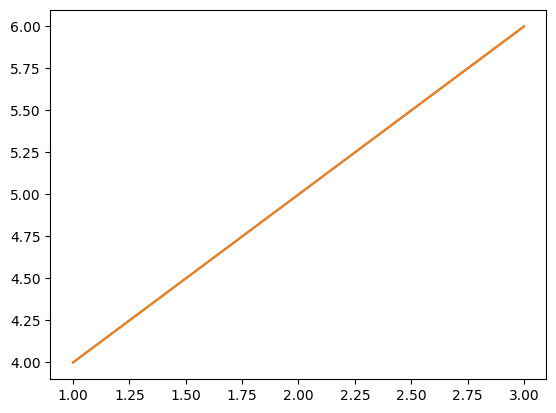

In [14]:
# 딱 그래프만 출력이 되게하고, return이 되는 list는 안보이게 만드는 방법
_ = plt.plot(x, y)
plt.plot(x, y);

- 예제1

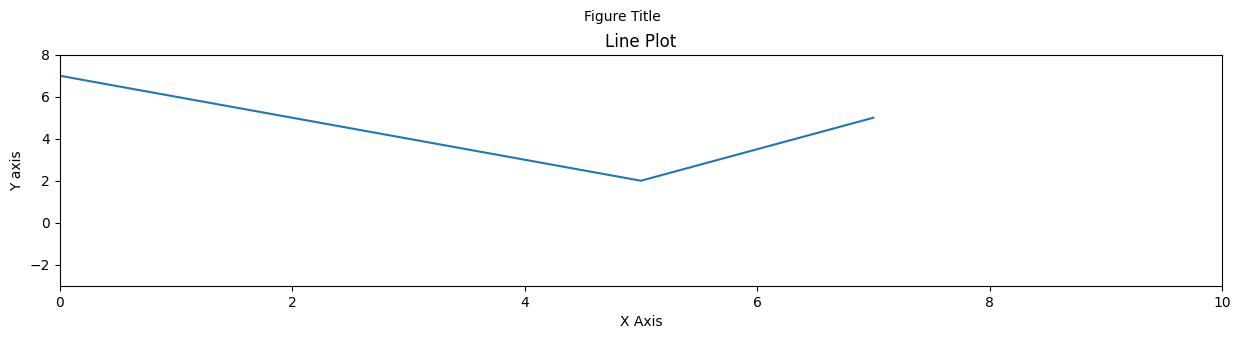

In [15]:
x = [-3, 5, 7]
y = [10, 2, 5]

# 아래와 같은 상태들을 외부 변수가 아닌 라이브러리 내부적으로 가지고 있는 것. 그것이 statefull 인터페이스
# plt에 계속 집어넣고 있다.
plt.figure(figsize=(15, 3)); # 이렇게 명명하지 않으면 matplotlib이 알아서 만든다. 

plt.plot(x, y);
plt.xlim(0, 10);
plt.ylim(-3, 8);
plt.xlabel('X Axis');
plt.ylabel('Y axis');
plt.title('Line Plot');
plt.suptitle('Figure Title', size=10, y=1.03); # 여러 플롯을 합친 figure일 수도 있으니까, 종합적 타이틀.
# shift + tab으로 함수 확인.
# 여러개의 subplot을 그리기가 너무 어렵다. 각각의 설정을 해주는 것이 애매함.

- 예제2

In [16]:
samsung_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,1260,1300,1255,1295,1232965,0.040
2017-01-03,1305,1315,1280,1310,886559,0.012
2017-01-04,1305,1310,1280,1305,446070,-0.004
2017-01-05,1305,1330,1300,1320,721691,0.011
2017-01-06,1320,1345,1305,1325,645608,0.004


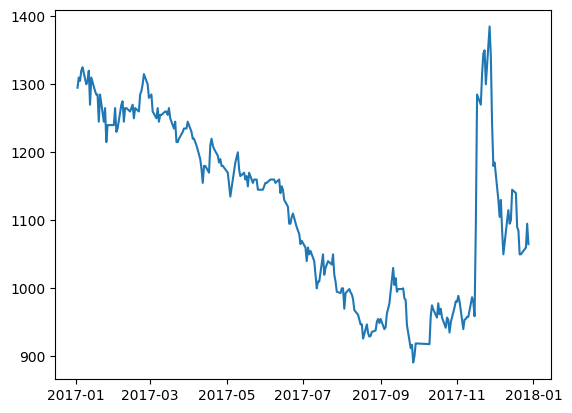

In [17]:
plt.plot(
    samsung_df.index,
    samsung_df['Close']
)

## Stateless(or object-oriented)

- Matplotlib의 각 component를 하나의 object로 받아서, 함수 실행 및 property 설정/변경
    - figure, ax(es)를 먼저 생성한다음, 하나하나 더하고, 적용하는 식
- 적용과정이 명시적으로 코드로 드러나기 때문에 조금 더 직관적임
 

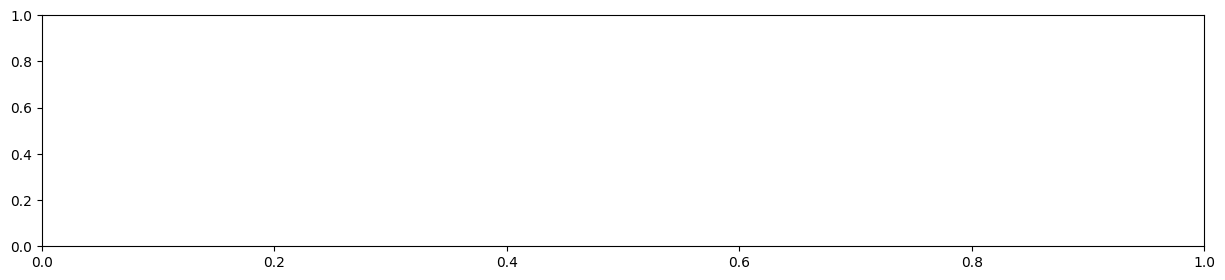

In [7]:
x = [-3, 5, 7]
y = [10, 2, 5]

fig, ax = plt.subplots(figsize=(15, 3))
# shift+tab으로 함수 확인하기. nrows와 nclos로 몇개의 그래프를 그릴지 정할 수 있다.

In [8]:
type(fig)
type(ax)

matplotlib.figure.Figure

matplotlib.axes._subplots.AxesSubplot

In [13]:
ax.plot(x, y);
ax.set_xlim(0, 10);
ax.set_ylim(-3, 8);
ax.set_xlabel('X axis');
ax.set_ylabel('Y axis');
ax.set_title('Line Plot');
fig.suptitle('Figure Title', size=10, y=1.03);
# set_과 get_을 많이 사용하는 것은 OOP에서 많이 쓰이는 방식.

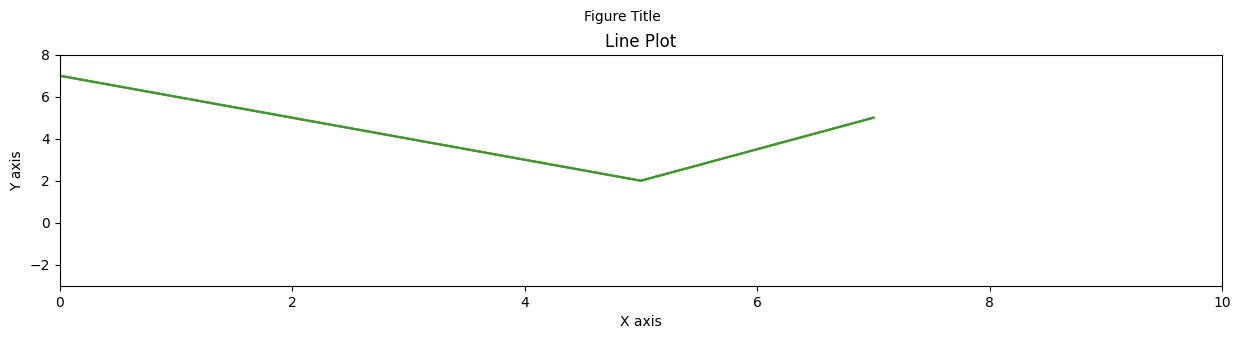

In [14]:
fig

- 한번에 시각화 그래프가 나오게 하기

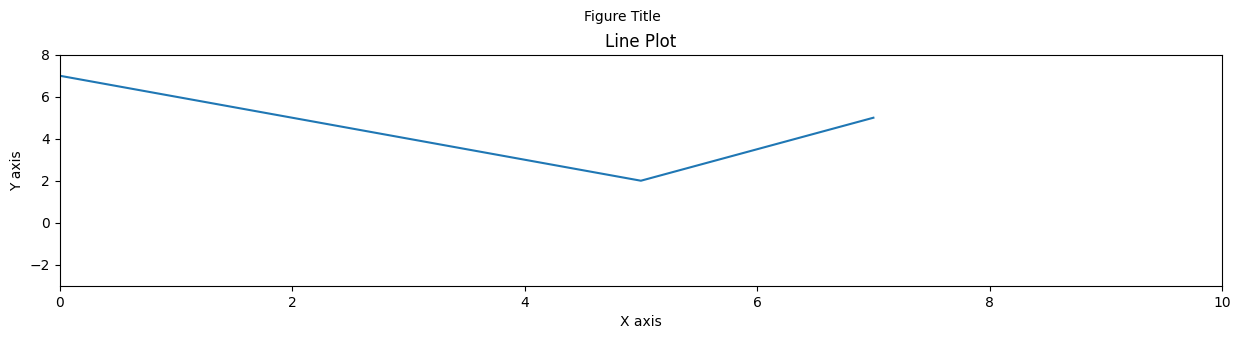

In [15]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(x, y);
ax.set_xlim(0, 10);
ax.set_ylim(-3, 8);
ax.set_xlabel('X axis');
ax.set_ylabel('Y axis');
ax.set_title('Line Plot');
fig.suptitle('Figure Title', size=10, y=1.03);

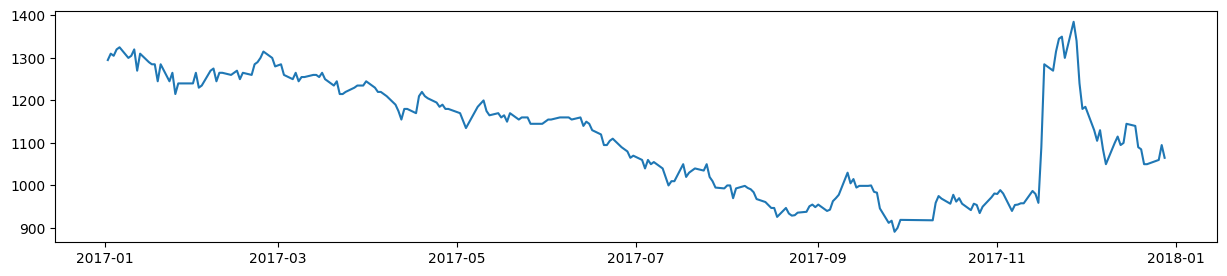

In [18]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(samsung_df.index, samsung_df['Close'])

-> OOP 방식으로 익히는 것이 확장성 및 추후 새로운 visualization lib에 대해 익힐 때 더 도움이 많이 됨!

# Matplotlib components에 대해 조금 더 깊게 들여다보기

## figure, axes

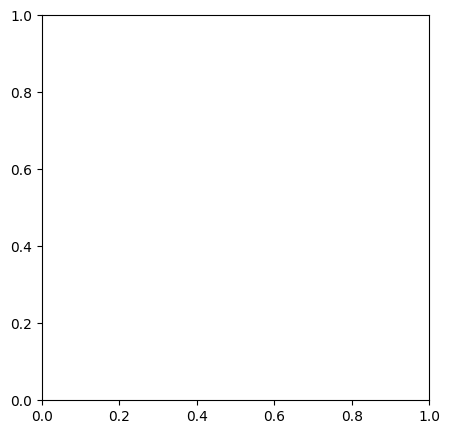

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

In [20]:
ax

<AxesSubplot: >

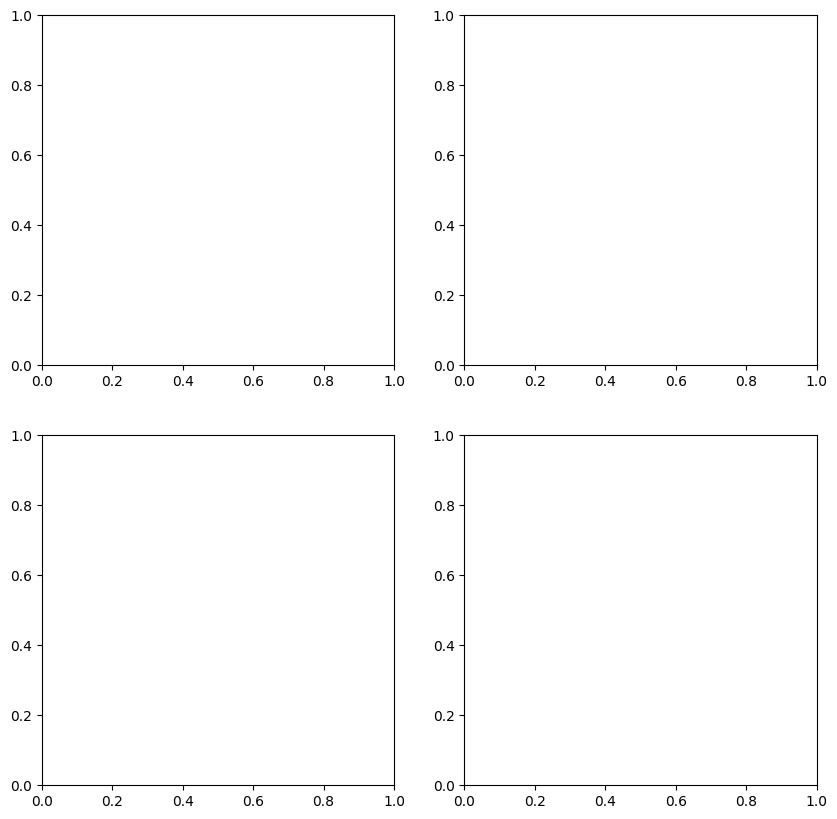

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# 보통 여러 그래프를 그리면 axes로 관습적으로 받는다.

In [22]:
type(fig)
type(axes)   # 2차원 array (행렬형태)

matplotlib.figure.Figure

numpy.ndarray

In [23]:
axes[0][0]   # 2차원 array에 대한 indexing으로 target ax에 접근

<AxesSubplot: >

- nrows or ncols가 1보다 크면, `ax`의 type은 `AxesSubplot`가 아니라 numpy array of `AxesSubplot` 


## Children of ax(es)

In [24]:
axes[0][0].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

- `spines`: axes를 둘러싸고 있는 border
- `axis`: x,y축
    - `ticks`, `labels` 등을 가지고 있음

- `axis`
    - **Tip: get/set 관련 함수들을 잘 이용하기**

In [25]:
ax = axes[0][0]

In [26]:
ax.xaxis

In [27]:
# get_xaxis() 메소드 내부에는 `return self.xaxis` 와 같이 구현이 되어있습니다.
ax.get_xaxis()

In [28]:
ax.xaxis == ax.get_xaxis()

True

## 예제

In [29]:
data = fdr.DataReader("005930", start="2019-01-01", end="2020-01-01")
close_series = data['Close']
volume_series = data['Volume']

In [30]:
close_series.head()
volume_series.head()

Date
2019-01-02    38750
2019-01-03    37600
2019-01-04    37450
2019-01-07    38750
2019-01-08    38100
Name: Close, dtype: int64

Date
2019-01-02     7847664
2019-01-03    12471493
2019-01-04    14108958
2019-01-07    12748997
2019-01-08    12756554
Name: Volume, dtype: int64

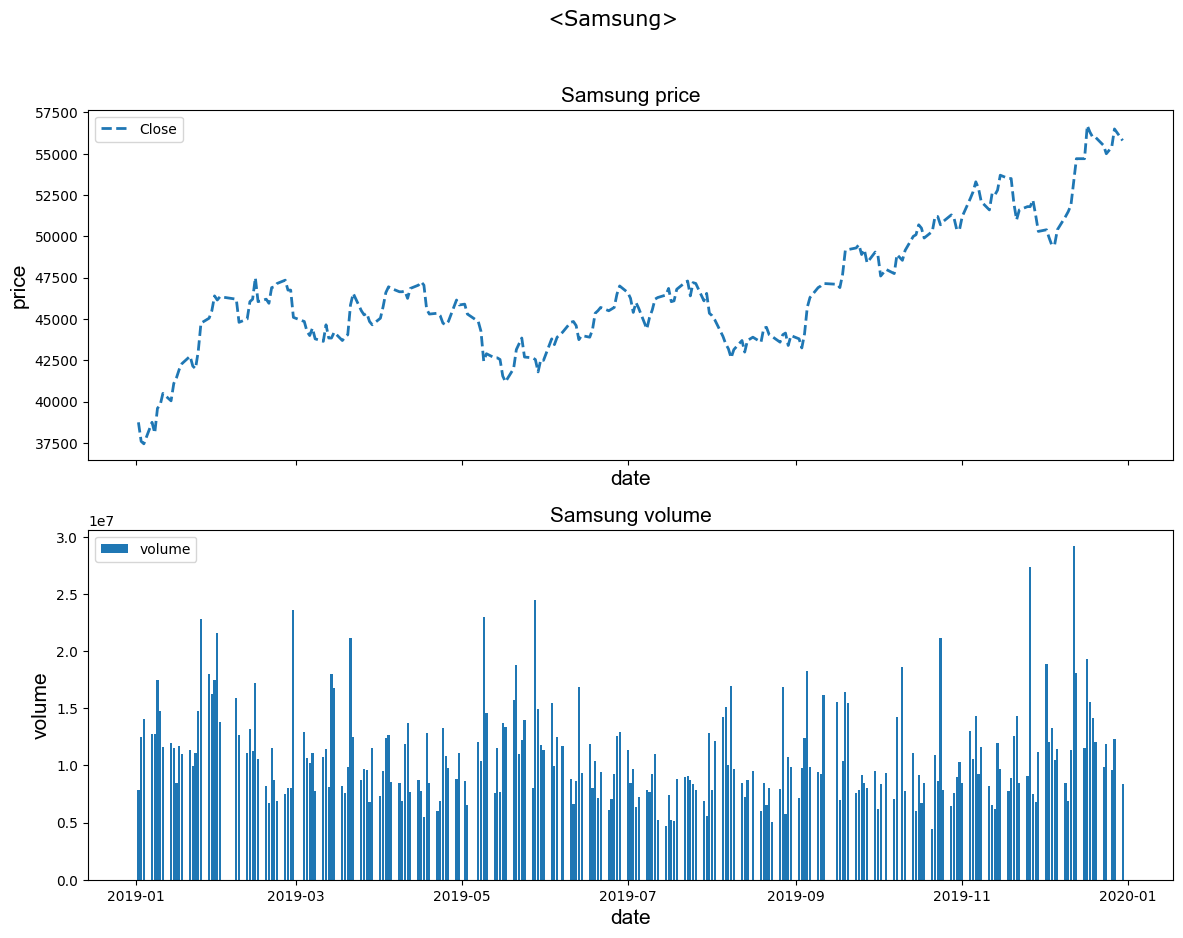

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,10), sharex=True) # sharex: 같은 x축을 쓸것
ax1 = axes[0]
ax2 = axes[1]

# matplotlib 공식 문서를 꼭 참고하라!
# https://matplotlib.org/stable/tutorials/index
# ax1
ax1.plot(close_series.index, close_series, linewidth=2, linestyle='--', label="Close");
_ = ax1.set_title('Samsung price', fontsize=15, family='Arial');
_ = ax1.set_ylabel('price', fontsize=15, family='Arial');
_ = ax1.set_xlabel("date", fontsize=15, family='Arial');
ax1.legend(loc="upper left");

# ax2
ax2.bar(volume_series.index, volume_series, label="volume");
_ = ax2.set_title('Samsung volume', fontsize=15, family='Arial');
_ = ax2.set_ylabel('volume', fontsize=15, family='Arial');
_ = ax2.set_xlabel("date", fontsize=15, family='Arial');
ax2.legend(loc="upper left");

fig.suptitle("<Samsung>", fontsize=15, family='Verdana');

- 참고

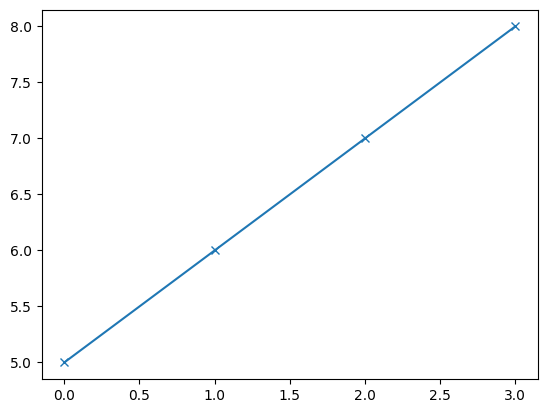

In [34]:
fig, ax = plt.subplots()
ax.plot([5,6,7,8], marker='x')
# 하나만 넣으면 y값이 된다. 인덱스는 0, 1, 2, ...

# Plotting with Pandas 

- DataFrame, Series는 `plot()`을 호출하면, 내부적으로 matplotlib api를 호출함
- plot을 시행한 후 `ax`를 return함
- matplotlib arg는 그대로 전달 가능
- plot의 종류(`kind` arg)
    - `bar, line, scatter`, etc
    - `hist, box`, etc

In [35]:
import FinanceDataReader as fdr

In [36]:
samsung_series = fdr.DataReader("005930", "2017-01-01", "2018-01-01")['Close']
kodex_series = fdr.DataReader("069500", "2017-01-01", "2018-01-01")['Close']

In [37]:
price_df = pd.concat([samsung_series, kodex_series], axis=1)
price_df.columns = ["삼성전자", "KODEX 200"]
price_df.head()

,삼성전자,KODEX 200
Date,,
2017-01-02,36100,23318
2017-01-03,36480,23503
2017-01-04,36160,23530
2017-01-05,35560,23439
2017-01-06,36200,23538


In [38]:
price_max_df = price_df.groupby(price_df.index.month).max()
price_max_df.head()
# datetime type이니까 월로 그룹을 만들 수 있다.

,삼성전자,KODEX 200
Date,,
1,39900,24178
2,39560,24407
3,42560,25367
4,44620,25797
5,47020,27658


<AxesSubplot: xlabel='Date'>

C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.c

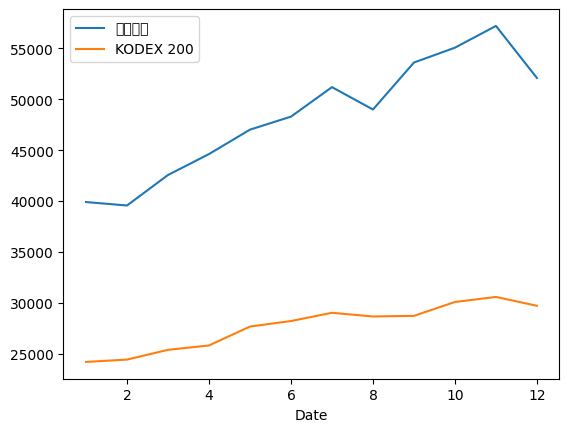

In [39]:
# Series 혹은 DataFrame 변수에 대해 plot()함수만 호출하면 기본적인 plotting이 진행됨
price_max_df.plot()

- 미리 설정한 fig, ax에 대해 plotting하기 

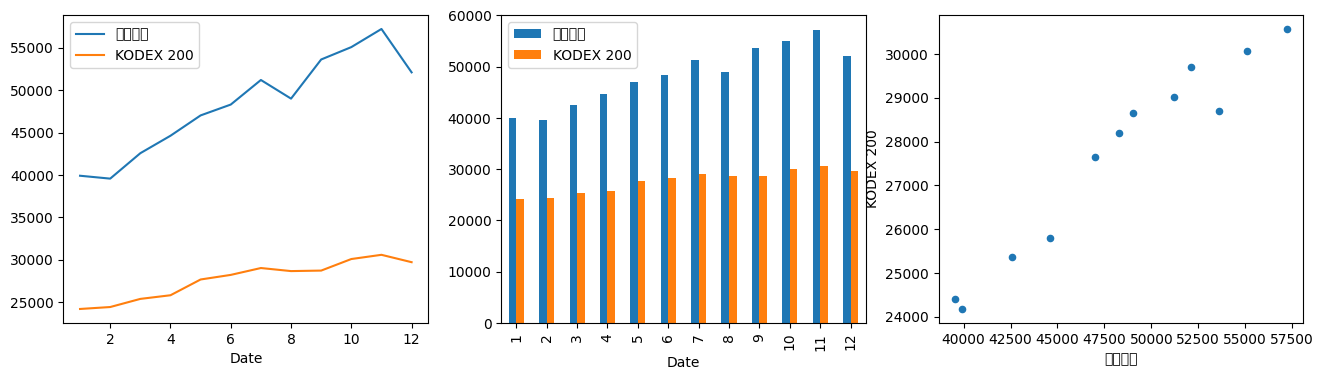

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

# 서브플롯으로 여러개 그리고 싶으면 아래와 같이 ax를 전달해줘야 한다.
# line이나 bar는 자동으로 index가 x축이 된다. 이런 그래프가 몇가지 있다.
# scatter는 그렇지 않다는 것에 주의! 각각을 설정해주어야 한다.
price_max_df.plot(ax=ax1, kind='line');
price_max_df.plot(ax=ax2, kind='bar');
price_max_df.plot(ax=ax3, x='삼성전자', y='KODEX 200', kind='scatter');

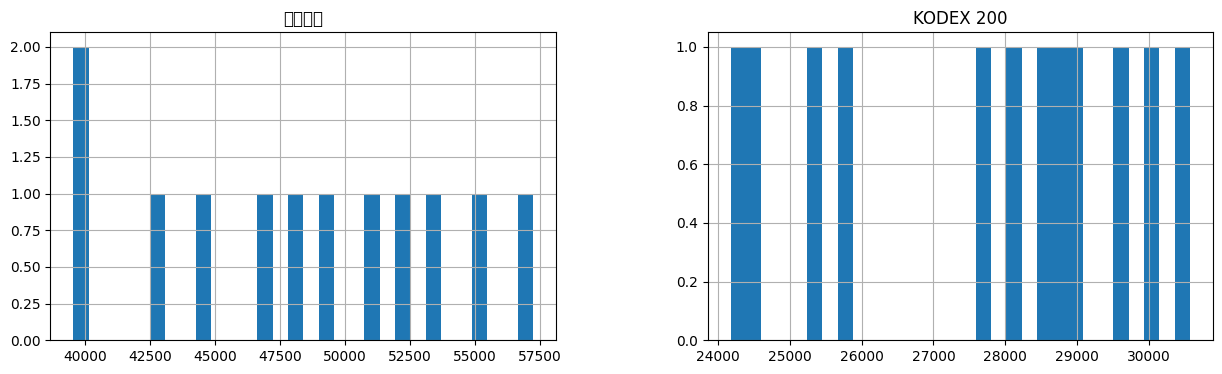

In [41]:
# 꼭 plot을 통하지 않아도 아래와 같이 함수를 따로 불러서 사용 가능.
# 내부적으로 데이터 구조를 파악하여 두개의 그래프를 그림.
# 도수분포표, 해당 값이 몇번 나오는가?
price_max_df.hist(figsize=(15, 4), bins=30);

In [42]:
price_df.pct_change() # => p2/p1 - 1
# 다음 행의 값을 이전 행의 값으로 나누어서 1 뺀다. 얼마나 변했는지를 보여준다.

,삼성전자,KODEX 200
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.011,0.008
2017-01-04,-0.009,0.001
2017-01-05,-0.017,-0.004
2017-01-06,0.018,0.004
...,...,...
2017-12-21,-0.034,-0.019
2017-12-22,0.011,0.005
2017-12-26,-0.030,-0.004


C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.c

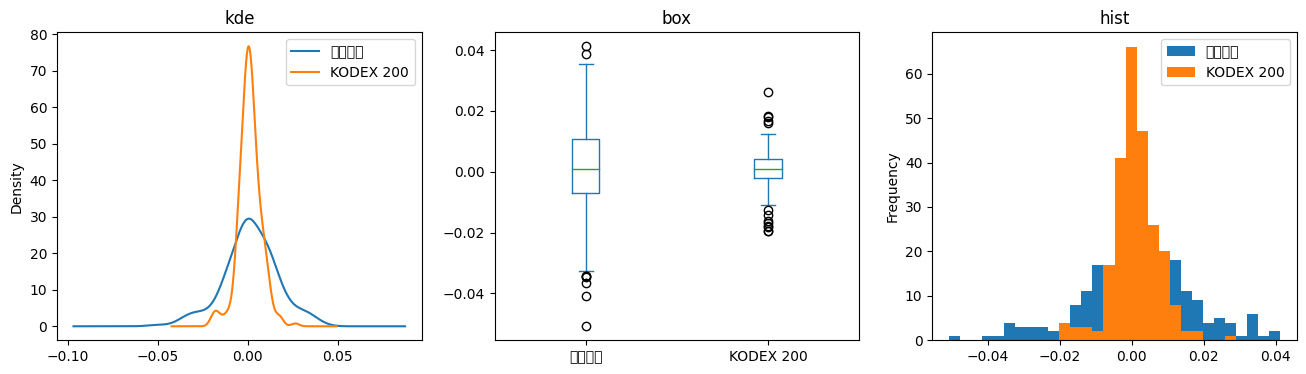

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

# 아무런 데이터를 전달하지 않았음을 주목.

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde'); # 히스토그램을 라인으로
price_df.pct_change().plot(kind='box', ax=ax2, title='box'); # 데이터의 분포를 보여주는 그래프
price_df.pct_change().plot(kind='hist', ax=ax3, title='hist', bins=30);

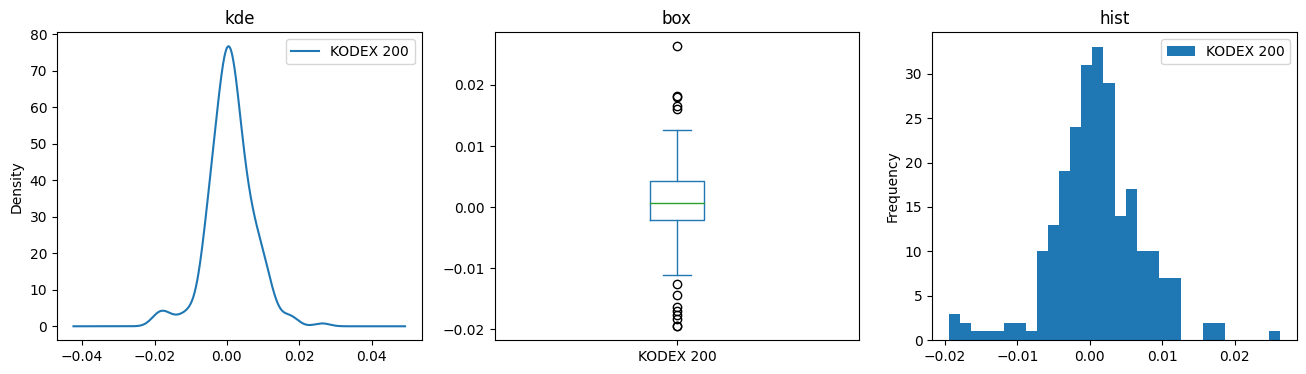

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

# x에 컬럼명을 전달했는데, 사실 x축이 아닌다.
# 이들 그래프는 값의 분포를 보고자 하는 그래프들로, x축은 이미 정해져있다.
# 어떤 컬럼을 가지고 보여줄 것인가를 x에 입력하는 것.

price_df.pct_change().plot(x="삼성전자", kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(x="삼성전자", kind='box', ax=ax2, title='box');
price_df.pct_change().plot(x="삼성전자", kind='hist', ax=ax3, title='hist', bins=30);

- 한글 Font 가능하게
    - Google에 "matplotlib 한글" or "matplotlib 한글 windows" 이라고 검색
    - Window: https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html
    - Mac OS / Linux : http://corazzon.github.io/matplotlib_font_setting
    - https://programmers.co.kr/learn/courses/21/lessons/950 등등

In [45]:
import matplotlib.font_manager as fm

In [46]:
for f in fm.fontManager.ttflist:
    if 'Gothic' in f.name:
        print((f.name, f.fname))

('Yu Gothic', 'C:\\Windows\\Fonts\\YuGothL.ttc')
('MS Gothic', 'C:\\Windows\\Fonts\\msgothic.ttc')
('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf')
('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framdit.ttf')
('Copperplate Gothic Light', 'C:\\Windows\\Fonts\\COPRGTL.TTF')
('Franklin Gothic Heavy', 'C:\\Windows\\Fonts\\FRAHV.TTF')
('Yu Gothic', 'C:\\Windows\\Fonts\\YuGothM.ttc')
('Franklin Gothic Demi', 'C:\\Windows\\Fonts\\FRADMIT.TTF')
('HYGothic-Extra', 'C:\\Windows\\Fonts\\H2GTRE.TTF')
('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICBI.TTF')
('Franklin Gothic Demi', 'C:\\Windows\\Fonts\\FRADM.TTF')
('Copperplate Gothic Bold', 'C:\\Windows\\Fonts\\COPRGTB.TTF')
('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framd.ttf')
('Showcard Gothic', 'C:\\Windows\\Fonts\\SHOWG.TTF')
('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICI.TTF')
('HYGothic-Medium', 'C:\\Windows\\Fonts\\H2GTRM.TTF')
('Franklin Gothic Demi Cond', 'C:\\Windows\\Fonts\\FRADMCN.TTF')
('Franklin Gothic Heavy', 'C:\\Windows

In [55]:
plt.rcParams["font.family"] = 'HYGothic-Extra'

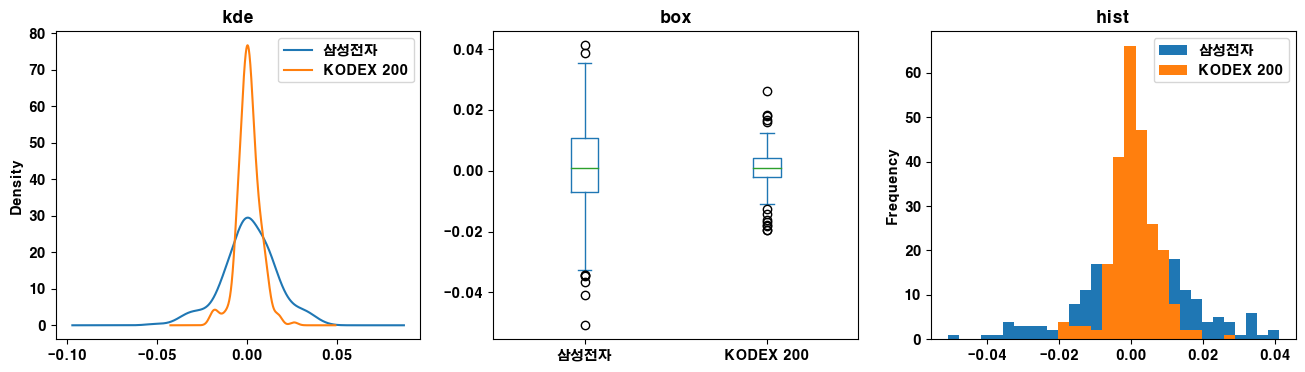

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(kind='box', ax=ax2, title='box');
price_df.pct_change().plot(kind='hist', ax=ax3, title='hist', bins=30);

- minus가 깨지는 경우 해결법

In [53]:
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

matplotlib minus problem mac os

# Seaborn 

In [ ]:
!pip install seaborn==0.9.0

In [57]:
import seaborn as sns
# https://seaborn.pydata.org/examples/index.html
# 예시를 모아둔 사이트.

In [58]:
df = pd.read_csv("my_data/Small_and_Big.csv", index_col=0, parse_dates=["date"])
df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000


In [59]:
median_df = df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.columns = ["median_시가총액"]
median_df.head()

,median_시가총액
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000


In [60]:
df = df.join(median_df, on="date")

In [61]:
df.loc[df['시가총액 (보통)(평균)(원)'] < df['median_시가총액'], "size"] = "small"
df.loc[df['시가총액 (보통)(평균)(원)'] >= df['median_시가총액'], "size"] = "big"

In [62]:
df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),median_시가총액,size
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000,34947000000.000,small
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000,34947000000.000,big
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000,34947000000.000,big
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000,34947000000.000,big
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000,34947000000.000,small


## Count plot 유한개의 categorical value를 세는 plot

### matplotlib version

In [63]:
df['size'].value_counts()

big      118022
small    117907
Name: size, dtype: int64

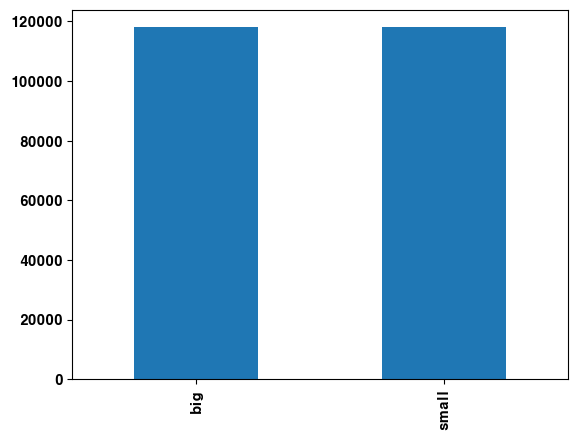

In [64]:
df['size'].value_counts().plot(kind='bar');

<AxesSubplot: >

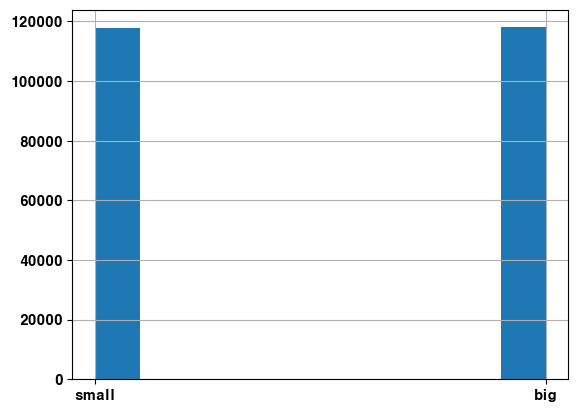

In [65]:
df['size'].hist()

### seaborn version

<AxesSubplot: xlabel='size', ylabel='count'>

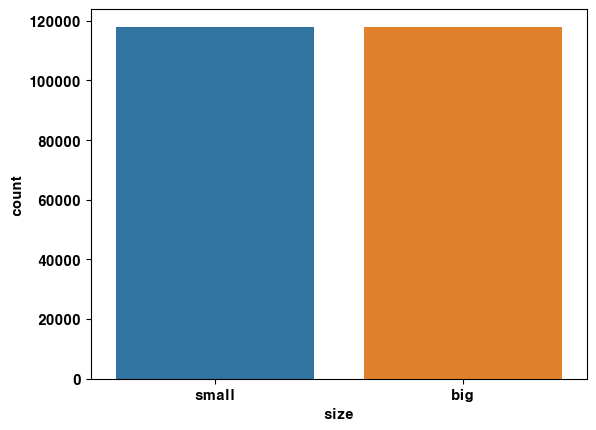

In [66]:
sns.countplot(x="size", data=df)
# 항상 data를 전달해야 한다. pandas가 아니니까. x에는 df의 컬럼명을 준다.

## 수익률 bar plot

In [67]:
df.shape

(235929, 8)

In [68]:
# 데이터 사이즈 줄이기
df = df[df['date'] >= "2017-01-01"]

In [69]:
df.shape

(28279, 8)

In [70]:
df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),median_시가총액,size
207650,2017-01-31,3S,3.220,1.225,-2.150,121442000000.000,138218500000.000,small
207651,2017-01-31,AJ네트웍스,0.890,NaN,-17.850,286576000000.000,138218500000.000,big
207652,2017-01-31,AJ렌터카,0.840,0.180,6.350,184235000000.000,138218500000.000,big
207653,2017-01-31,AP위성,1.400,NaN,-2.730,134105000000.000,138218500000.000,small
207654,2017-01-31,BGF,2.530,-0.673,12.100,4328976000000.000,138218500000.000,big


### matplotlib version 

In [71]:
df.groupby(['date'])['수익률(%)'].mean()
# 월별 데이터로 그룹을 만들어 평균 수익률을 보자.

date
2017-01-31   -1.083
2017-02-28    0.252
2017-03-31    1.845
2017-04-30    1.845
2017-05-31    4.130
2017-06-30    0.831
2017-07-31   -3.174
2017-08-31    0.540
2017-09-30    0.540
2017-10-31    3.632
2017-11-30    5.547
2017-12-31    5.547
2018-01-31   12.478
2018-02-28   -3.717
2018-03-31   -3.717
2018-04-30    6.085
2018-05-31    1.051
2018-06-30    1.051
Name: 수익률(%), dtype: float64

<AxesSubplot: xlabel='date'>

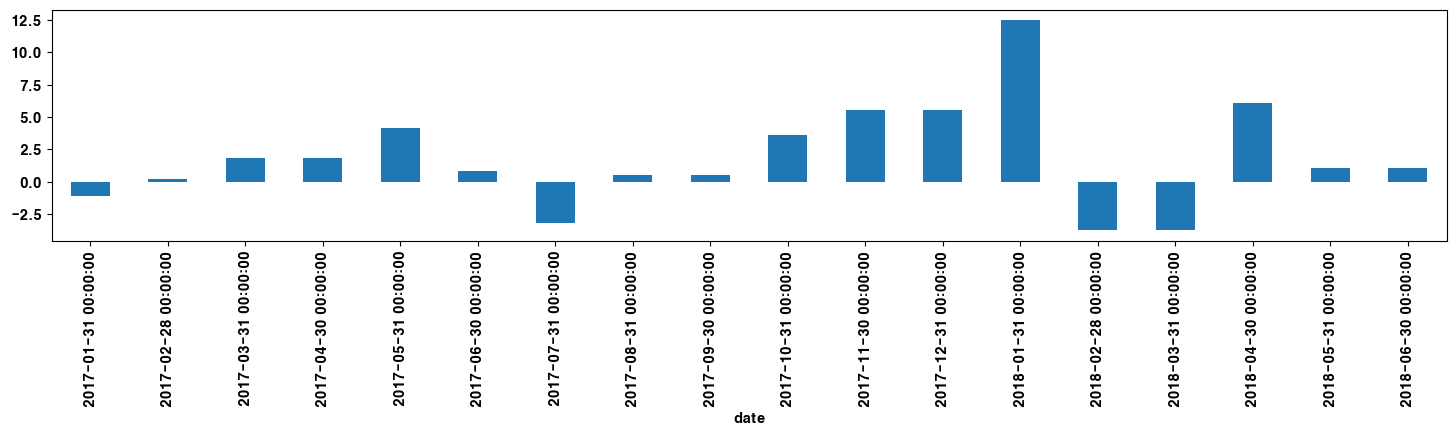

In [72]:
df.groupby(['date'])['수익률(%)'].mean().plot(kind='bar', figsize=(18, 3))

In [73]:
# 날짜 x tick label을 조금더 심플하게 나타나도록 만들기: DateTime object -> 문자열 object로 변환
df['date'] = df['date'].dt.strftime("%Y-%m-%d")   # %Y, %m 등과 같은 표현에 대해서 조금더 자세하게 알고 싶으신 분은 구글에 python datetime format으로 검색해보세요!

In [ ]:
# datetime 
# strftime
# strptime
# 파이썬의 위 모듈과 함수에 대해 알아보면 날짜와 문자열 변환 등에 대한 정보를 얻을 수 있다.

<AxesSubplot: xlabel='date'>

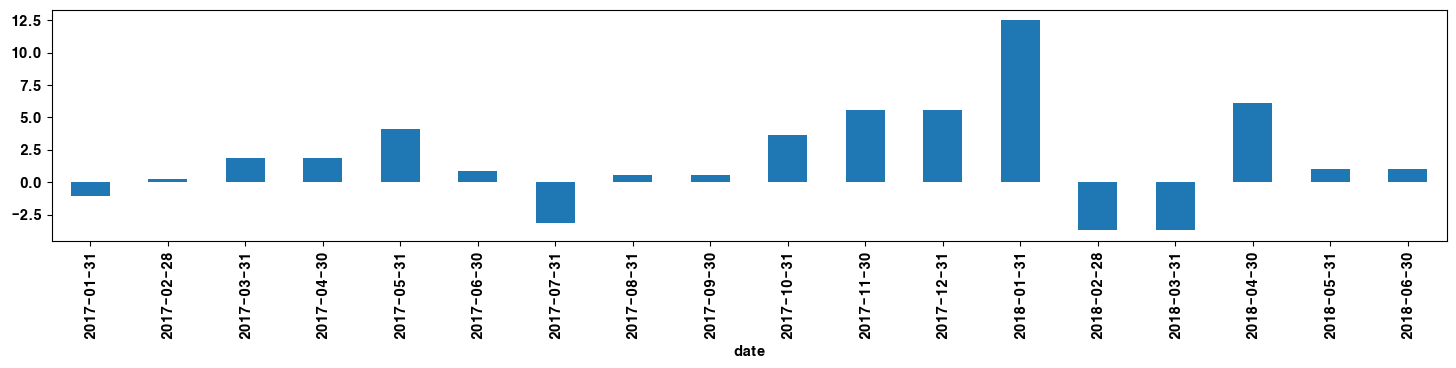

In [74]:
df.groupby(['date'])['수익률(%)'].mean().plot(kind='bar', figsize=(18, 3))

### seaborn version 

<AxesSubplot: xlabel='date', ylabel='수익률(%)'>

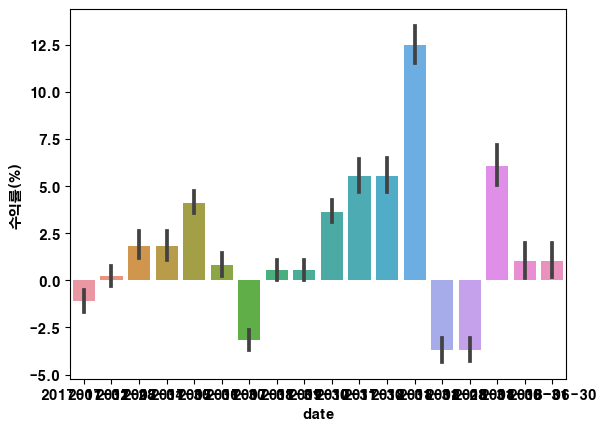

In [75]:
sns.barplot(data=df, x="date", y="수익률(%)")
# x와 y는 컬럼명을 입력한다.
# sns 역시 ax를 리턴한다. matplotlib의 wrapper이기 때문에, ax를 같이 사용한다.

# 아니, seaborn은 어느새 barplot에 벌써 하나로 표시했을까?
# seaborn은 위의 tidy form의 데이터에 대하여 자동으로 aggregation 진행! 
# 평균을 알아서 구해서 막대기로 표시하고, 검은색 심지는 표준편차 또는 신뢰구간으로 할 수도 있다

# 만약 pandas의 messy data와 tidy data 사이의 변환, 즉 stack, unstack, pivot, melt 등을 알고 싶다면 더 검색해볼 것.

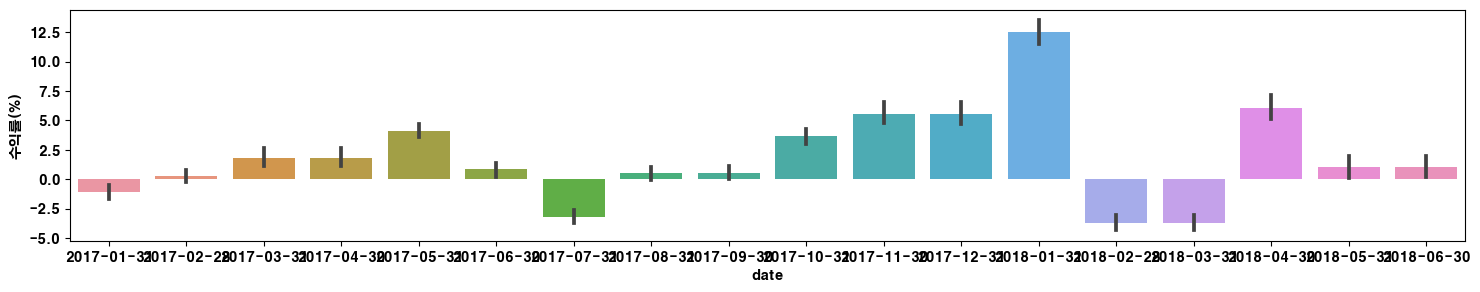

In [76]:
# OOP로 figsize를 적용한 object를 받아서 seaborn에 전달해주는 방식으로 진행한다.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))
ax = sns.barplot(data=df, x="date", y="수익률(%)", ax=ax);

- x tick label을 45도 돌리기

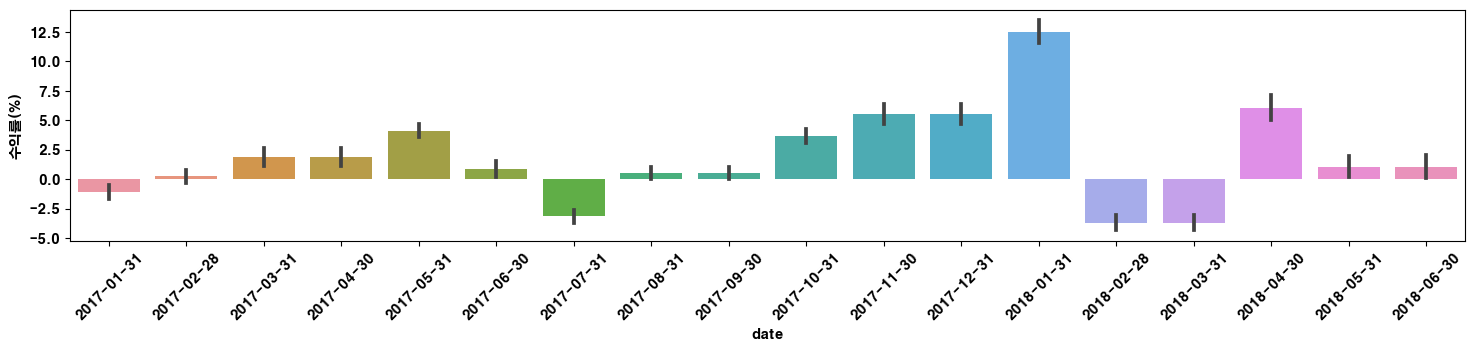

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))
ax = sns.barplot(data=df, x="date", y="수익률(%)", ax=ax);
# 이렇게 ax를 사용하는 라이브러리에서는 아래와 같은 방식이 모두 사용 가능할 것.

# 외우지 마라! 구글링이다!
current_x_tick_label = ax.get_xticklabels()
ax.set_xticklabels(current_x_tick_label, rotation=45);

- hue 넣기

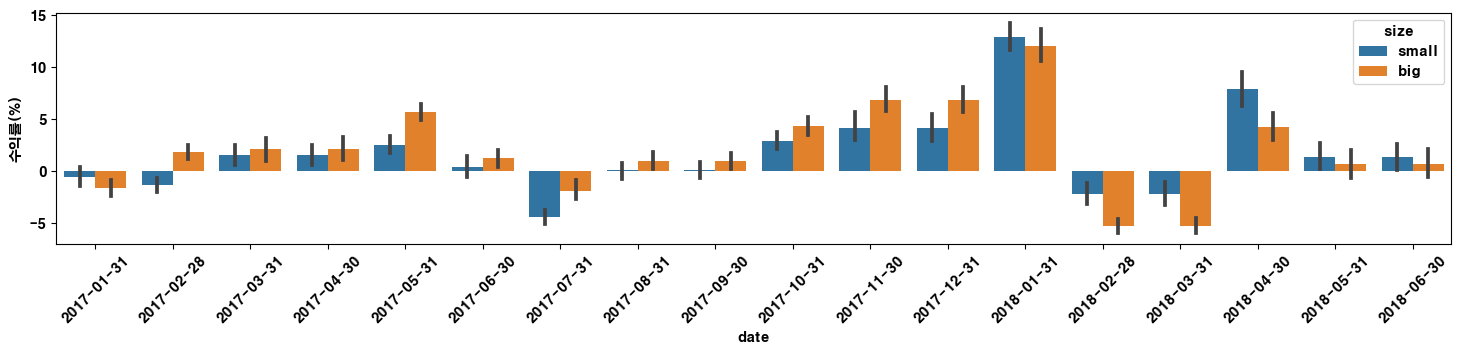

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))
sns.barplot(data=df, x="date", y="수익률(%)", ax=ax, hue="size")
# hue에 categorical 컬럼명을 넣으면, 그 카테고리 각각에 대해 plot한다.
# matplotlib에는 없는데, seaborn에서 쓰기 좋은 기능.

current_x_tick_label = ax.get_xticklabels()
ax.set_xticklabels(current_x_tick_label, rotation=45);

## relation plot (다차원 그래프)

In [80]:
df.head(2)

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),median_시가총액,size
207650,2017-01-31,3S,3.220,1.225,-2.150,121442000000.000,138218500000.000,small
207651,2017-01-31,AJ네트웍스,0.890,NaN,-17.850,286576000000.000,138218500000.000,big


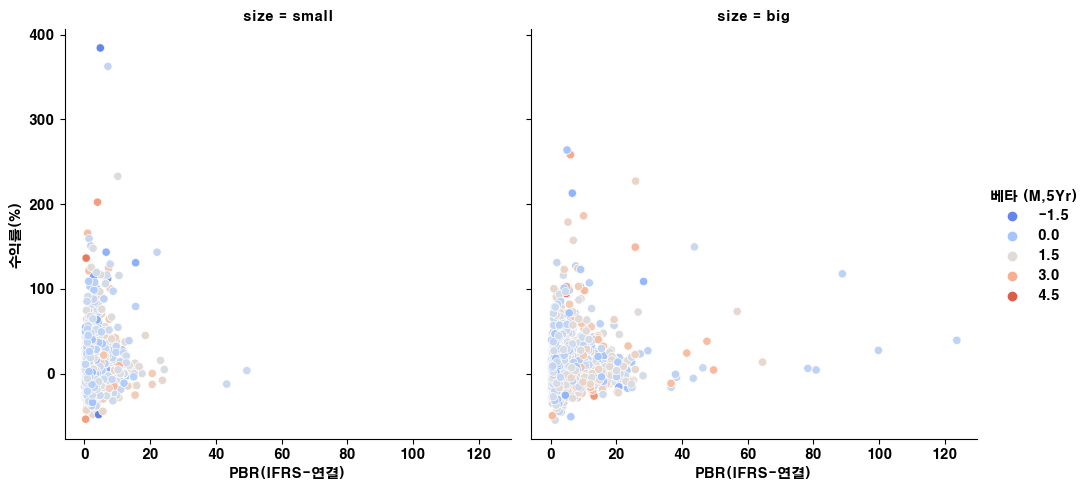

In [81]:
sns.relplot(
    x="PBR(IFRS-연결)",
    y="수익률(%)",
    col="size",
    hue="베타 (M,5Yr)",
    data=df,
    
    palette="coolwarm",
)
# scatter처럼 x와 y를 설정하고, col에 categorical 데이터를 넣으면 각각 그려주는 것.
# 추가적인 데이터를 색 변화로 표시해주기 위해, hue를 설정해준다. categorical, numeric 다 가능.
# hue처럼 size 표시할 수 있고, col처럼 row 설정 가능.

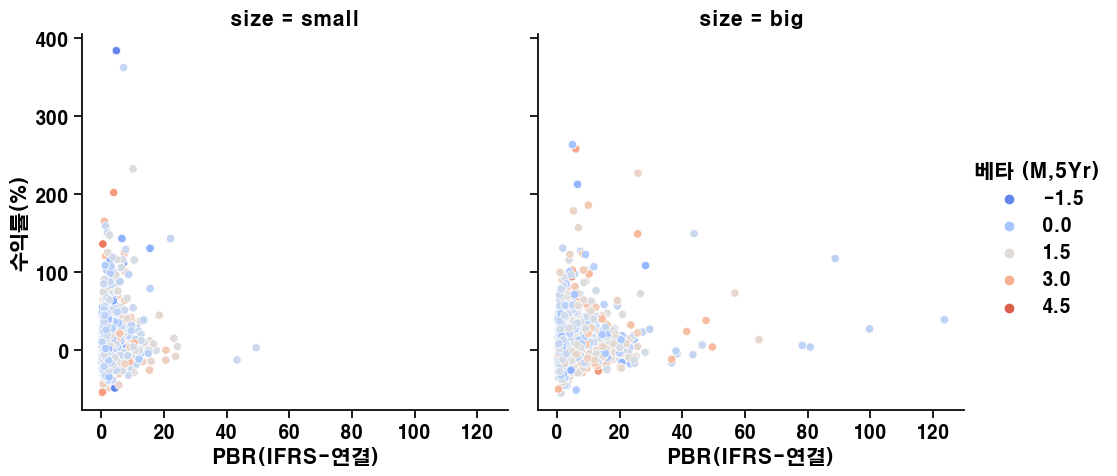

In [82]:
# 구글링! 다 외우지 말고 찾아보자!
with sns.plotting_context("notebook", font_scale=1.2):
    sns.relplot(
        x="PBR(IFRS-연결)",
        y="수익률(%)",
        col="size",
        hue="베타 (M,5Yr)",
        palette="coolwarm",
        data=df
    )

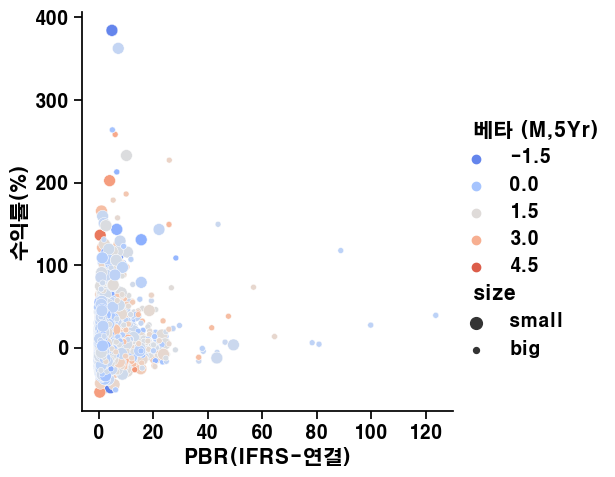

In [83]:
with sns.plotting_context("notebook", font_scale=1.2):
    sns.relplot(
        x="PBR(IFRS-연결)",
        y="수익률(%)",
        size="size",           # `col` 대신 `size`사용
        hue="베타 (M,5Yr)",
        palette="coolwarm",
        data=df
    )

# 실전예제 

In [84]:
df_list = []
for i in range(2015, 2018):
    df_list.append(
        pd.read_csv("my_data/naver_finance/{}_12.csv".format(i))
    )

In [85]:
df = pd.concat(df_list)

In [86]:
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,AK홀딩스,28071.479,3.787,-1.334,-374.431,-7.677,-1.421,15.120,-3245.741,43497.723,211899.220,-19.472,1.453,0.298,63200.000,56000.000
1,BGF,43342.800,4.236,3.526,1528.413,22.771,10.327,271.957,3071.872,15605.457,87779.875,28.779,5.665,1.007,44202.000,42140.000
2,BNK금융지주,51740.254,13.455,10.253,5304.712,9.116,0.609,NaN,1853.180,21665.062,19749.037,4.544,0.389,0.426,8420.000,8680.000
3,BYC,1821.960,11.598,7.222,131.581,3.546,2.024,13.235,15693.808,453030.620,216899.980,29.279,1.014,2.118,459500.000,397000.000
4,CJ,211667.080,5.789,2.604,5511.155,5.874,2.365,5.821,5780.626,110304.560,594563.900,40.944,2.146,0.398,236684.000,176334.000


In [87]:
df = df.dropna()

In [88]:
df['rtn'] = df['price2'] / df['price'] - 1

In [89]:
#
# outlier(이상치) 제거하기
# 2시그마 내부의 데이터만 사용하려고 한다. 정규분포일시 95%.
# trimming. 특정 시기, 연도에만 수익률이 높고 그러면 일단 빼놓고 생각하자.
for col in df.columns:
    if col not in ['ticker', 'price2', 'price', 'rtn']:
        mu = df[col].mean()
        std = df[col].std()
        
        cond1 = mu - 2*std <= df[col]
        cond2 = df[col] <= mu + 2*std
        
        df = df[cond1 & cond2]

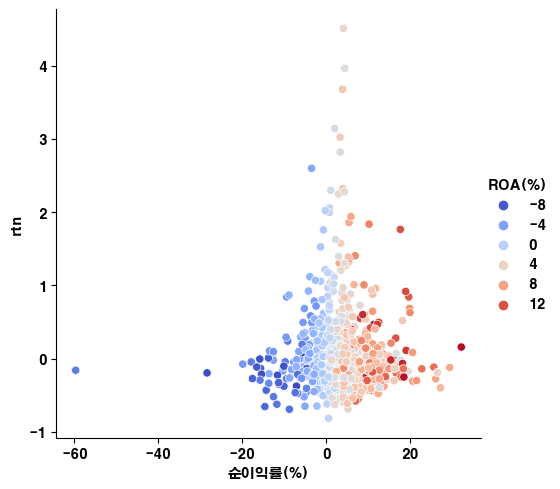

In [90]:
# with sns.plotting_context("notebook", font_scale=1.2):
sns.relplot(
    x="순이익률(%)",
    y="rtn",
    hue="ROA(%)",
    palette="coolwarm",
    data=df
)
# ROA: 자산 대비 수익률. 

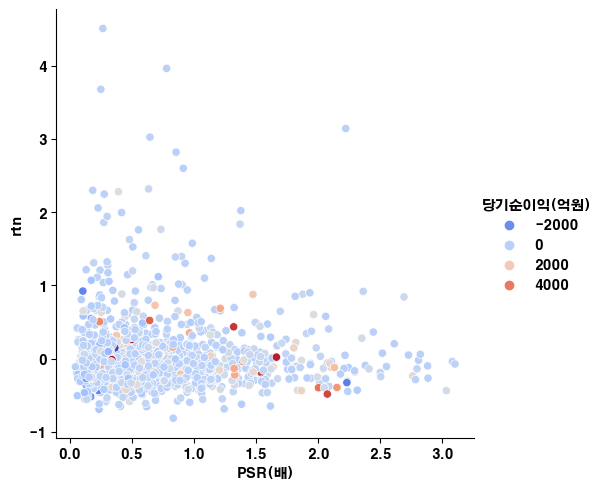

In [97]:
# with sns.plotting_context("notebook", font_scale=1.2):
sns.relplot(
    x="PSR(배)",
    y="rtn",
    hue="당기순이익(억원)",
    palette="coolwarm",
    data=df
)

- Seaborn plot 종류
    - https://seaborn.pydata.org/examples/index.html